In [355]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt
from scipy import constants
with MPRester("1d0vsHZ2FSTu7WRT") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-12317")
from pymatgen.electronic_structure.plotter import BSDOSPlotter
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter

#Style ecriture
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string)) 
    
bandstructure = m.get_bandstructure_by_material_id("mp-12317")

#Obtenir la bande interdite
printmd('**BANDE INTERDITE**')
Bande_Interdite = bandstructure.get_band_gap()
print("La bande interdite du SrCN2 est : %s" %Bande_Interdite)
print("Dès lors, nous pouvons dire que son énergie vaut %f eV, sa transition est %s et qu'elle est indirecte car     direct=%s." %(Bande_Interdite.get('energy'),Bande_Interdite.get('transition'), Bande_Interdite.get('direct')))


**BANDE INTERDITE**

La bande interdite du SrCN2 est : {'direct': False, 'energy': 3.2055999999999996, 'transition': 'Z-\\Gamma'}
Dès lors, nous pouvons dire que son énergie vaut 3.205600 eV, sa transition est Z-\Gamma et qu'elle est indirecte car     direct=False.


**DIRECTIONS DE DISPERSION**

*Avant de commencer le calcul de dispersion, nous pouvons tout d'abord vérifier si la bande interdite renvoyée par la fonction ci-dessus est bien la même que celle obtenue grâce à la fonction bs_plot_data().*

*La bande interdite renvoyée par cette fonction est : Indirect Z-\Gamma bandgap = 3.2055999999999996.*

*On observe donc bien qu'il s'agit de la même que celle renvoyée ci-dessus et affichée sur le site de Materials Project.*

*Nous pouvons donc maintenant passer au calcul de la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion :*

Tout d'abord, nous allons trouver l'indice de la dernière bande de valence et de la première bande de conduction.
Pour ce faire, on peut utiliser la fonction get_cbm() qui nous renverra l'indice de la première bande de conduction. Dès lors, nous savons que l'indice de la dernière bande de valence est l'indice de la première bande de conduction diminué de 1.



**Calcul de l'indice de la dernière (première) bande de valence (conduction) :**

Nous obtenons que l'indice de la première bande de conduction est 12. 
Et donc que l'indice de la dernière bande de valence est 11. 


Pour trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le
moins de dispersion nous allons calculer la pente de ces 2 bandes dans chacune des branches. En effet, la dispersion est le rapport de l'énergie sur une distance. 
La branche dans laquelle la pente sera la plus grande (petite) correspondra à la branche qui a le plus (moins) de dispersion. 


**Calcul des pentes :**

Pour les calculer, nous allons faire la différence entre notre valeur maximale et minimale de l'énergie divisée par  la longueur de la branche. Nous allons encoder ces valeurs dans un vecteur pour lequel chaque colonne correspond à    une branche.



*Les pentes de la dernière bande de valence dans chaque branche sont reprises dans le vecteur suivant : [0.7775309962780252, 0.4046735944647708, 0.5329897133056617, 1.5698447594716332, 0.4506824375121399, 0.3696419901273444, 0.782353173022482, 0.643569656368001, 0.6341349316342259].*

*Tandis que celles de la première bande de conduction dans chaque branche sont reprises dans le vecteur suivant : [1.5823078848078986, 2.0918950221491364, 1.1887305151236922, 1.7918299907237538, 1.9437441661432397, 1.8659442195272251, 0.09757438450055964, 0.477280237777994, 0.8795913204763003].*


Il ne reste plus qu'à prendre la valeur de la pente la plus grande et de la pente la plus petite dans la dernière (première) bande de valence (conduction) : 


*La plus grande dispersion de la dernière bande de valence se trouve dans la branche 4, sa valeur vaut 1.569845 [eV/Angstrom].* 

*La plus petite dispersion de la dernière bande de valence se trouve dans la branche 6, sa valeur vaut 0.369642 [eV/Angstrom].* 

*La plus grande dispersion de la première bande de conduction se trouve dans la branche 2, sa valeur vaut 2.091895 [eV/Angstrom].* 

*La pente la plus petite de la première bande de conduction se trouve dans la branche 7, sa valeur vaut 0.097574 [eV/Angstrom].* 


Les directions de chacune des dispersions sont représentées dans la figure ci-dessous :


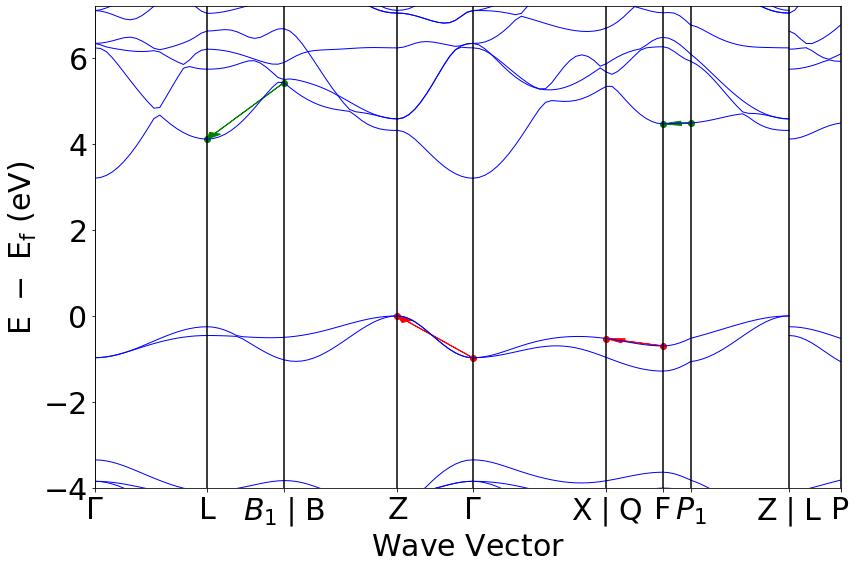

In [354]:
#Directions de dispersion
printmd('**DIRECTIONS DE DISPERSION**')

bs = BSPlotter(bandstructure)
data = bs.bs_plot_data()
Energie = data.get('energy')
Abscisses = data.get('distances')

printmd("*Avant de commencer le calcul de dispersion, nous pouvons tout d'abord vérifier si la bande interdite renvoyée par la fonction ci-dessus est bien la même que celle obtenue grâce à la fonction bs_plot_data().*")
Bande_Gap = data.get('band_gap')
printmd('*La bande interdite renvoyée par cette fonction est : %s.*' %Bande_Gap)
printmd("*On observe donc bien qu'il s'agit de la même que celle renvoyée ci-dessus et affichée sur le site de Materials Project.*")
printmd('*Nous pouvons donc maintenant passer au calcul de la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion :*')


    #Calcul de l'indice de la derniere bande de valence et de la premiere bande de conduction pour chaque branche. 
print("Tout d'abord, nous allons trouver l'indice de la dernière bande de valence et de la première bande de conduction.")
print("Pour ce faire, on peut utiliser la fonction get_cbm() qui nous renverra l'indice de la première bande de conduction. Dès lors, nous savons que l'indice de la dernière bande de valence est l'indice de la première bande de conduction diminué de 1.")
print('')
printmd("**Calcul de l'indice de la dernière (première) bande de valence (conduction) :**")
BdeDeCond = bandstructure.get_cbm()
IndCond = (BdeDeCond.get("band_index").get(list(BdeDeCond.get("band_index").keys())[0]))[0]
IndVal = IndCond - 1

print("Nous obtenons que l'indice de la première bande de conduction est %i. " %IndCond)
print("Et donc que l'indice de la dernière bande de valence est %i. " %IndVal)
print('')
print('')
print("Pour trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le")
print("moins de dispersion nous allons calculer la pente de ces 2 bandes dans chacune des branches. En effet, la dispersion est le rapport de l'énergie sur une distance. ")
print("La branche dans laquelle la pente sera la plus grande (petite) correspondra à la branche qui a le plus (moins) de dispersion. ")
printmd("**Calcul des pentes :**")
print("Pour les calculer, nous allons faire la différence entre notre valeur maximale et minimale de l'énergie divisée par  la longueur de la branche. Nous allons encoder ces valeurs dans un vecteur pour lequel chaque colonne correspond à    une branche.")
print('')

Energie_Branches_Val = []
Energie_Branches_Cond = []
for i in range (0,9) : 
    Energie_Branches_Val.append((Energie[i].get('1'))[IndVal])
    Energie_Branches_Cond.append((Energie[i].get('1'))[IndCond])

#Calcul des longueurs de chaque branche dans deltaX et de la différence entre le maximum et le minimum dans deltaY
deltaX = []
deltaYVal = []
deltaYCond = []
for i in range (0,9) : 
    deltaX.append(np.max(Abscisses[i])-np.min(Abscisses[i]))
    deltaYVal.append(np.max(Energie_Branches_Val[i])-np.min(Energie_Branches_Val[i])) 
    deltaYCond.append(np.max(Energie_Branches_Cond[i])-np.min(Energie_Branches_Cond[i]))  

PentesVal = []
PentesCond = []
for i in range (0,9):
    PentesVal.append(deltaYVal[i]/deltaX[i])
    PentesCond.append(deltaYCond[i]/deltaX[i])

printmd("*Les pentes de la dernière bande de valence dans chaque branche sont reprises dans le vecteur suivant : %s.*" %PentesVal)
print('')
printmd("*Tandis que celles de la première bande de conduction dans chaque branche sont reprises dans le vecteur suivant : %s.*" %PentesCond)
print('')
print("Il ne reste plus qu'à prendre la valeur de la pente la plus grande et de la pente la plus petite dans la dernière (première) bande de valence (conduction) : ")
IndPlusVal = np.argmax(PentesVal) + 1
IndMoinsVal = np.argmin(PentesVal) +1
IndPlusCond = np.argmax(PentesCond) +1
IndMoinsCond = np.argmin(PentesCond) +1

printmd("*La plus grande dispersion de la dernière bande de valence se trouve dans la branche %i, sa valeur vaut %f [eV/Angstrom].* " %(IndPlusVal,np.max(PentesVal)))
printmd("*La plus petite dispersion de la dernière bande de valence se trouve dans la branche %i, sa valeur vaut %f [eV/Angstrom].* " %(IndMoinsVal,np.min(PentesVal)))                   
printmd("*La plus grande dispersion de la première bande de conduction se trouve dans la branche %i, sa valeur vaut %f [eV/Angstrom].* " %(IndPlusCond,np.max(PentesCond)))
printmd("*La pente la plus petite de la première bande de conduction se trouve dans la branche %i, sa valeur vaut %f [eV/Angstrom].* " %(IndMoinsCond,np.min(PentesCond)))
print('')
print("Les directions de chacune des dispersions sont représentées dans la figure ci-dessous :")

Graphe = bs.get_plot()
plt.scatter(np.max(Abscisses[3]), Energie_Branches_Val[3][-1], color = 'red')
plt.scatter(np.min(Abscisses[3]), Energie_Branches_Val[3][0], color = 'red')
plt.arrow(np.max(Abscisses[3]),Energie_Branches_Val[3][-1],np.min(Abscisses[3])-np.max(Abscisses[3]),Energie_Branches_Val[3][0]-Energie_Branches_Val[3][-1],head_width = 0.1, length_includes_head = True, color =  'red' )

plt.scatter(np.max(Abscisses[5]), Energie_Branches_Val[5][-1], color = 'red')
plt.scatter(np.min(Abscisses[5]), Energie_Branches_Val[5][0], color = 'red')
plt.arrow(np.max(Abscisses[5]),Energie_Branches_Val[5][-1],np.min(Abscisses[5])-np.max(Abscisses[5]),Energie_Branches_Val[5][0]-Energie_Branches_Val[5][-1],head_width = 0.1, length_includes_head = True, color =  'red' )

plt.scatter(np.max(Abscisses[1]), Energie_Branches_Cond[1][-1], color = 'green')
plt.scatter(np.min(Abscisses[1]), Energie_Branches_Cond[1][0], color = 'green')
plt.arrow(np.max(Abscisses[1]),Energie_Branches_Cond[1][-1],np.min(Abscisses[1])-np.max(Abscisses[1]),Energie_Branches_Cond[1][0]-Energie_Branches_Cond[1][-1],head_width = 0.1, length_includes_head = True, color =  'green' )

plt.scatter(np.max(Abscisses[6]), Energie_Branches_Cond[6][-1], color = 'green')
plt.scatter(np.min(Abscisses[6]), Energie_Branches_Cond[6][0], color = 'green')
plt.arrow(np.max(Abscisses[6]),Energie_Branches_Cond[6][-1],np.min(Abscisses[6])-np.max(Abscisses[6]),Energie_Branches_Cond[6][0]-Energie_Branches_Cond[6][-1],head_width = 0.1, length_includes_head = True, color =  'green' )




In [353]:
#Calcul de la masse effective
printmd('**MASSE EFFECTIVE :**')
print("La masse effective est inversément proportionnelle à la courbure de la dispersion de l'énergie dans l'espace des k.  Dès lors, on va dans un premier temps approximer notre courbe par une parabole (car on devait supposer une dispersion parabolique).")
print("Une fois notre parabole approximée, nous pourrons calculer la masse effective en divisant la constante de Planck par la dérivée seconde de l'équation parabolique (qui vaut 2*a, a étant le terme du second degré).")
print("Enfin, pour obtenir une masse effective en kg, il faut diviser le résultat par (1eV*1Å^2).")

Cbm = data.get('cbm')
Vbm = data.get('vbm')

bs = BSPlotter(bandstructure)
data = bs.bs_plot_data()
Abscisses = data.get('distances')

Sommet1 = Vbm[0]
Sommet2 = Vbm[2]
Base1 = Cbm[0]
Base2 = Cbm[1]

print('')
printmd('**Sommet 1**')
print("Le sommet 1 se trouve aux coordonnées (2.496488194843472, 0.0).")
AxeX1Val = Abscisses[2] + Abscisses[3]
Ordonnees1Val = Energie_Branches_Val[2] + Energie_Branches_Val[3]
parab1Val = np.polyfit(AxeX1Val, Ordonnees1Val, 2)
a1Val = parab1Val[0]

A = 10**(-10)
eV = 1.60218*10**(-19)
ConsttePlanck = constants.hbar

Masse_effective1Val = ((ConsttePlanck)**2)/(2*a1Val*(A**2)*eV)
print("La masse effective en kg au sommet 1 vaut :")
print(Masse_effective1Val)

print('')
printmd('**Sommet 2**')
print("Le sommet 2 se trouve aux coordonnées (5.72331177148325, 0.0).")
AxeX2Val = Abscisses[7] + Abscisses[8]
Ordonnees2Val = Energie_Branches_Val[7] + Energie_Branches_Val[8]

parab2Val = np.polyfit(AxeX2Val, Ordonnees2Val, 2)
a2Val = parab2Val[0]
Masse_effective2Val = ((ConsttePlanck)**2)/(2*a2Val*k)
print("La masse effective en kg au sommet 2 vaut :")
print(Masse_effective2Val)

print('')
printmd('**Base 1**')
print("La base 1 se trouve aux coordonnées (0.0, 3.2055999999999996).")
AxeX1Cond = Abscisses[3] + Abscisses[4]
Ordonnees1Cond = Energie_Branches_Val[3] + Energie_Branches_Val[4]
parab1Cond = np.polyfit(AxeX1Cond, Ordonnees1Cond, 2)
a1Cond = parab1Cond[0]

Masse_effective1Cond = ((ConsttePlanck)**2)/(2*a1Cond*k)
print("La masse effective en kg à la base 1 vaut :")
print(Masse_effective1Cond)

print('')
printmd('**Base 2**')
print("La base 2 se trouve aux coordonnées (3.1172502123107213, 3.2055999999999996).")
AxeX2Cond = Abscisses[0]
Ordonnees2Cond = Energie_Branches_Val[0]
parab2Cond = np.polyfit(AxeX2Cond, Ordonnees2Cond, 2)
a2Cond = parab2Cond[0]

Masse_effective2Cond = ((ConsttePlanck)**2)/(2*a2Cond*k)
print("La masse effective en kg à la base 2 vaut :")
print(Masse_effective2Cond)


**MASSE EFFECTIVE :**

La masse effective est inversément proportionnelle à la courbure de la dispersion de l'énergie dans l'espace des k.  Dès lors, on va dans un premier temps approximer notre courbe par une parabole (car on devait supposer une dispersion parabolique).
Une fois notre parabole approximée, nous pourrons calculer la masse effective en divisant la constante de Planck par la dérivée seconde de l'équation parabolique (qui vaut 2*a, a étant le terme du second degré).
Enfin, pour obtenir une masse effective en kg, il faut diviser le résultat par (1eV*1Å^2).



**Sommet 1**

Le sommet 1 se trouve aux coordonnées (2.496488194843472, 0.0).
La masse effective en kg au sommet 1 vaut :
-2.5816965572651995e-30



**Sommet 2**

Le sommet 2 se trouve aux coordonnées (5.72331177148325, 0.0).
La masse effective en kg au sommet 2 vaut :
-2.770354873345662e-30



**Base 1**

La base 1 se trouve aux coordonnées (0.0, 3.2055999999999996).
La masse effective en kg à la base 1 vaut :
3.660902876781322e-30



**Base 2**

La base 2 se trouve aux coordonnées (3.1172502123107213, 3.2055999999999996).
La masse effective en kg à la base 2 vaut :
2.6441734633600095e-28
